In [208]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt


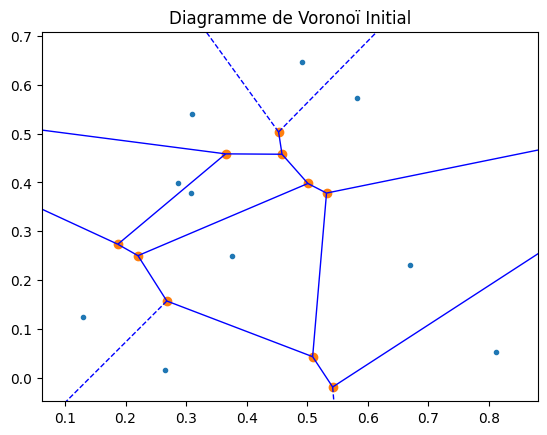

In [209]:
points = np.random.rand(10, 2)  # 10 sites initiaux
voronoi_initial = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
ax.set_title('Diagramme de Voronoï Initial')
plt.show()


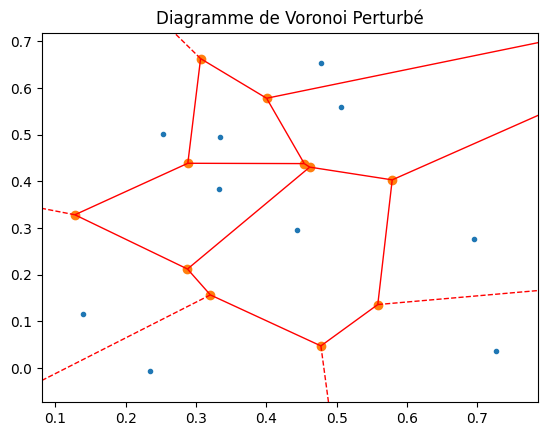

In [210]:
# Étape 3 : Perturbation des positions des sites
perturbation = np.random.normal(scale=0.05, size=points.shape)
points_perturbed = points + perturbation

# Étape 4 : Calcul du nouveau diagramme de Voronoi
voronoi_perturbed = Voronoi(points_perturbed)

# Affichage du nouveau diagramme
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_perturbed, ax=ax, show_vertices=True, line_colors='red')
ax.set_title('Diagramme de Voronoi Perturbé')
plt.show()

initial (12, 2)
perturbed (12, 2)
Différences des sommets: [0.05218707 0.09248993 0.10519154 0.4219583  0.82586579 0.07798864
 0.86498261 0.17651313 0.29880181 0.51823027 0.31611752 0.09087069]


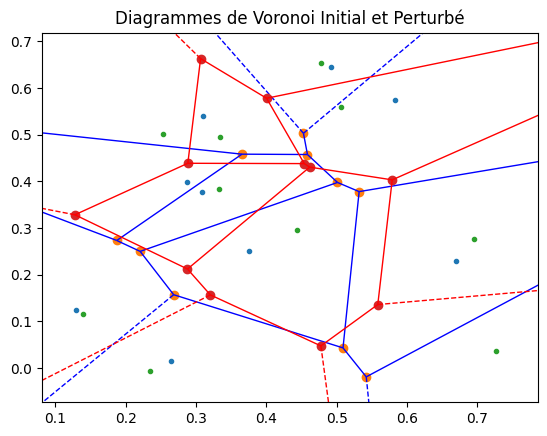

In [211]:
# Étape 5 : Comparaison des sommets
initial_vertices = voronoi_initial.vertices
perturbed_vertices = voronoi_perturbed.vertices


print("initial",initial_vertices.shape)
print("perturbed",perturbed_vertices.shape)

if initial_vertices.shape == perturbed_vertices.shape:
    vertex_differences = np.linalg.norm(initial_vertices - perturbed_vertices, axis=1)
    print("Différences des sommets:", vertex_differences)
else:
    print("Les diagrammes de Voronoi ont un nombre différent de sommets.")

# Affichage des deux diagrammes pour visualisation
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
voronoi_plot_2d(voronoi_perturbed, ax=ax, show_vertices=True, line_colors='red')
ax.set_title('Diagrammes de Voronoi Initial et Perturbé')
plt.show()

APPROCHE ITÉRATIVE DE CORRECTION

----------------------------------------------------------------

In [212]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def cost_function(perturbed_vertices_falt, initial_points, perturbed_points, alpha=1.0):
    #if initial_vertices.shape != perturbed_vertices.shape:
        #return np.inf
    perturbed_vertices = perturbed_vertices_falt.reshape(-1, 2)
    initial_vertices = Voronoi(initial_points).vertices
    # Calculate the total squared distance between corresponding vertices
    vertex_difference = np.sum(np.linalg.norm(initial_vertices - perturbed_vertices, axis=1)**2)
    # Regularization term to keep perturbed points close to initial points
    regularization_term = np.sum(np.linalg.norm(Voronoi(initial_points).vertices -  Voronoi(perturbed_points).vertices, axis=1)**2)
    return vertex_difference + alpha * regularization_term

    #return vertex_difference



initial (12, 2)
perturbed (12, 2)


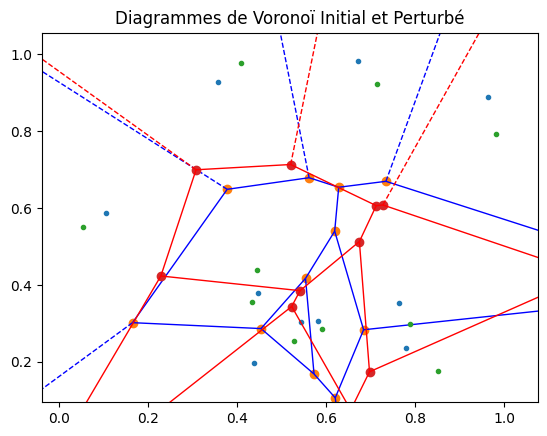

In [215]:
# Initialisation des sites
np.random.seed()  # Pour la reproductibilité
points = np.random.rand(10, 2)  # 10 sites initiaux

# Calcul du diagramme de Voronoï initial
voronoi_initial = Voronoi(points)
initial_vertices = voronoi_initial.vertices


# Perturbation des positions des sites
perturbation = np.random.normal(scale=0.05, size=points.shape)
points_perturbed = points + perturbation

voronoi_perturbed = Voronoi(points_perturbed)
perturbed_vertices = voronoi_perturbed.vertices

print("initial",initial_vertices.shape)
print("perturbed",perturbed_vertices.shape)

# Affichage des diagrammes initial et perturbé
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
voronoi_plot_2d(voronoi_perturbed, ax=ax, show_vertices=True, line_colors='red')
ax.set_title('Diagrammes de Voronoï Initial et Perturbé')
plt.show()


initial (12, 2)
perturbed (12, 2)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           24     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05998D+00    |proj g|=  1.64784D+00
Positions mises à jour : [0.23416144 0.49239394 0.76721955 0.54202801 0.54201263 0.69512738
 0.67171961 0.34681132 0.57793039 0.4396934  0.40818749 0.29052577
 0.24090716 0.11035453 1.10349314 0.44590205 0.61573001 0.33208161
 0.63281835 0.51324687 0.64117027 0.37619779 0.65669295 0.36435384]

At iterate    1    f=  1.21764D+00    |proj g|=  7.90114D-01


 This problem is unconstrained.


<Figure size 640x480 with 0 Axes>

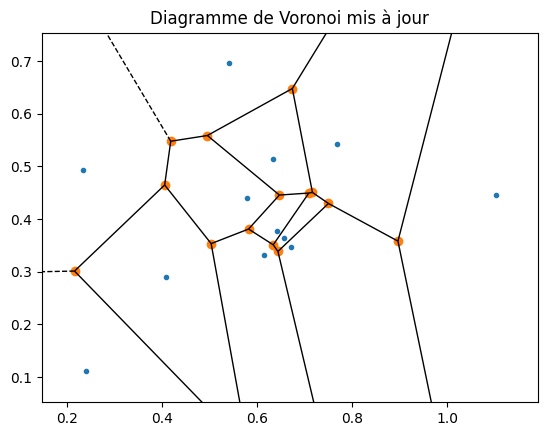

Positions mises à jour :
 [0.16586079 0.30177511 0.37814233 0.64850484 0.56184994 0.67866261
 0.62050332 0.10638392 0.45399851 0.28645153 0.5729179  0.16833664
 0.55382926 0.41695469 1.49855006 0.38436433 0.68407608 0.28334189
 0.73413004 0.66930539 0.62827354 0.65386689 0.61924719 0.53961621]
At iterate    2    f=  3.69089D-01    |proj g|=  7.77156D-08


<Figure size 640x480 with 0 Axes>

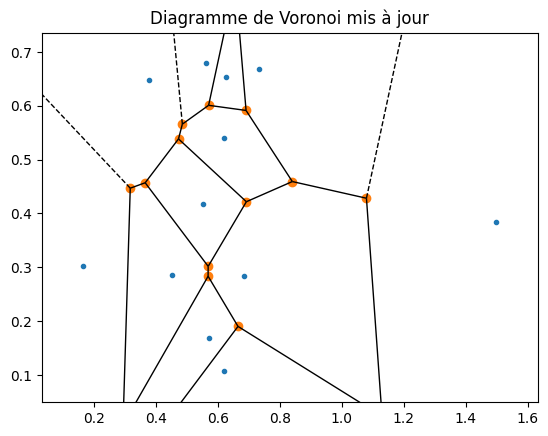


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   24      2      3      1     0     0   7.772D-08   3.691D-01
  F =  0.36908892507024543     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


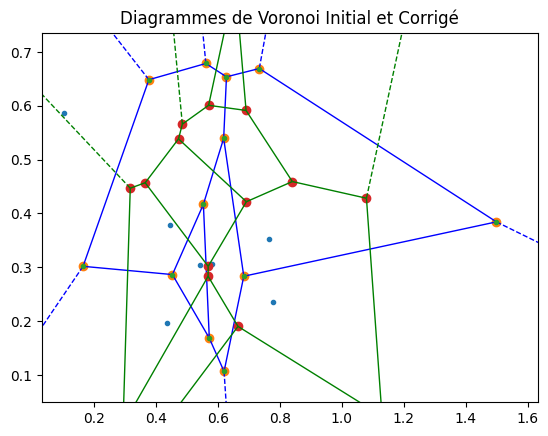

In [216]:
# Fonction de rappel pour la minimisation
def callback(xk):
    print("Positions mises à jour :", xk)
    plt.figure()
    vor = Voronoi(xk.reshape(-1, 2))
    voronoi_plot_2d(vor)
    plt.title("Diagramme de Voronoi mis à jour")
    plt.show()


print("initial",initial_vertices.shape)
print("perturbed",perturbed_vertices.shape)
# Minimisation de la fonction de coût
result = minimize(
    cost_function,
    perturbed_vertices.flatten(),
    args=(voronoi_initial.points, voronoi_perturbed.points, 0.1),
    method='L-BFGS-B',
    callback=callback,
    options={'disp': True}
)

# Résultats finaux
corrected_points = result.x.reshape(-1, 2)
voronoi_corrected = Voronoi(corrected_points)

# Affichage du diagramme de Voronoï corrigé
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
voronoi_plot_2d(voronoi_corrected, ax=ax, show_vertices=True, line_colors='green')
ax.set_title('Diagrammes de Voronoi Initial et Corrigé')
plt.show()